![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 11/10/2021**

Para este projeto exploraremos os dados **Call_Data.csv** disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 8 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **11/10/2021**.

# Questões

**1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description'(0,5 pontos)** 
     * 1.1. Como está o balanceamento das classes?*
     * P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset
     * P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [ ]:
#!pip install seaborn

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from math import pi
from dateutil import parser
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from pandas.core.common import SettingWithCopyWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import cdist

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit


import warnings
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

In [178]:
RANDOM_STATE=100

In [179]:
df = pd.read_csv('Call_Data_Small.csv')

In [180]:
print(df['Event Clearance Description'].value_counts())

REPORT WRITTEN (NO ARREST)                    38008
ORAL WARNING GIVEN                            16837
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)    12673
UNABLE TO LOCATE INCIDENT OR COMPLAINANT      10150
PHYSICAL ARREST MADE                           8404
FALSE COMPLAINT/UNFOUNDED                      4527
PROBLEM SOLVING PROJECT                        3303
Name: Event Clearance Description, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

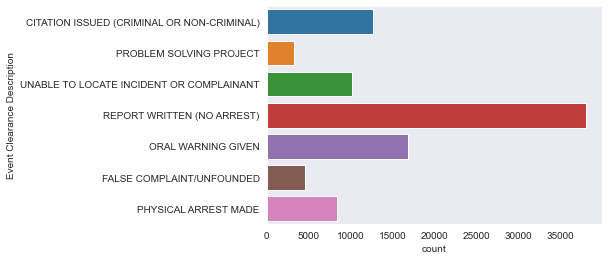

In [181]:
sns.countplot(y="Event Clearance Description", data=df)

As classes estão desbalanceadas. Tentar aplicar técnicas de balanceamento depois.

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos

In [182]:
df.head(3)

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3


- Como a chamada foi resolvida de acordo com a prioridade?

<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

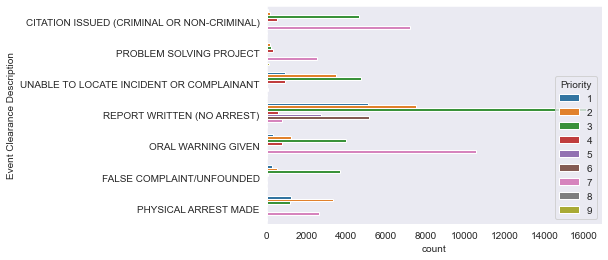

In [183]:
sns.countplot(y='Event Clearance Description', hue='Priority', data=df)

- E pelo tipo de chamada?

<AxesSubplot:xlabel='count', ylabel='Event Clearance Description'>

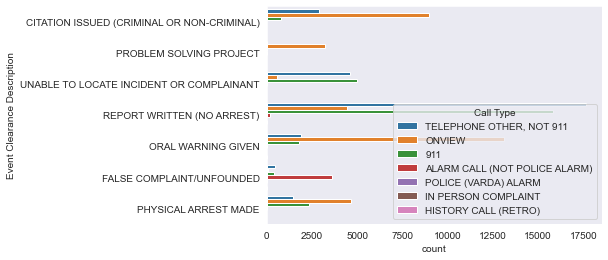

In [184]:
sns.countplot(y='Event Clearance Description', hue='Call Type', data=df)

- E levando em consideração a prioridade e tipo da chamada?

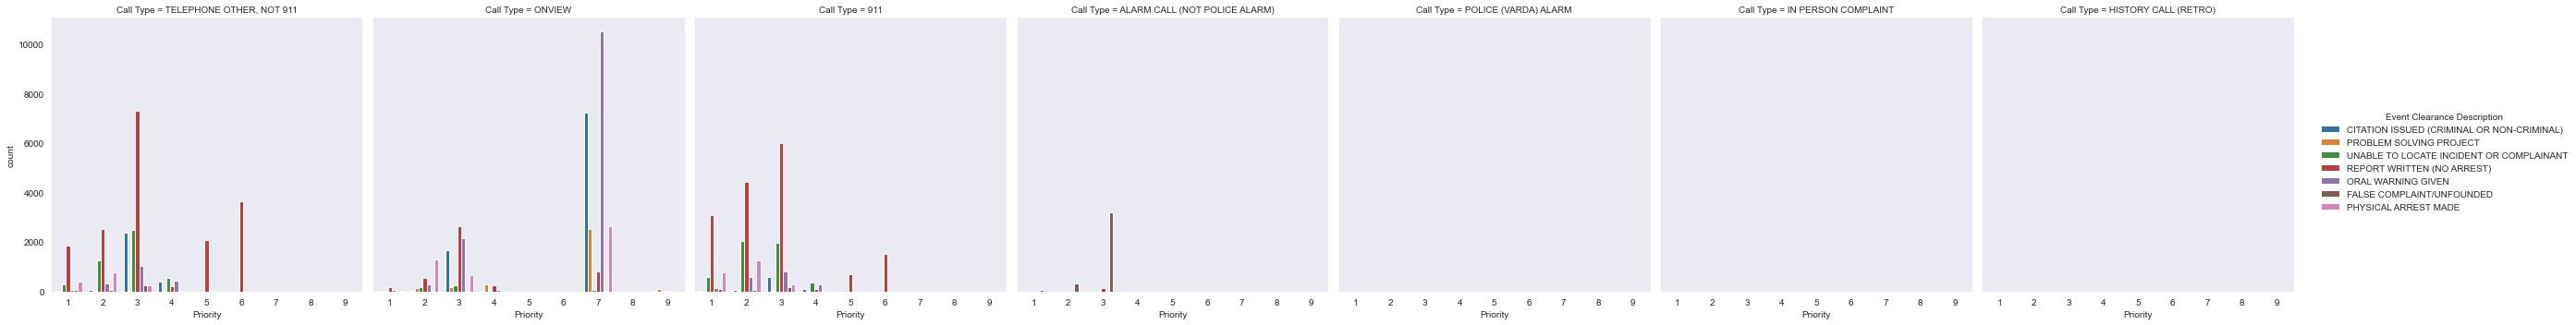

In [185]:
sns.catplot(x='Priority', hue='Event Clearance Description', col="Call Type", kind="count", data=df)

- Qual setor recebeu/atendeu mais chamadas?

<AxesSubplot:xlabel='count', ylabel='Sector'>

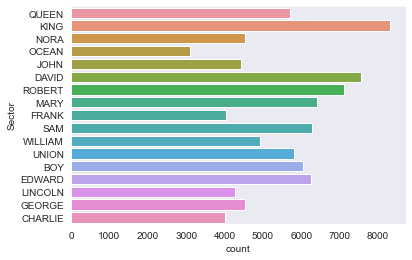

In [186]:
sns.countplot(y='Sector', data=df)

- Qual delegacia recebeu/atendeu mais chamadas?

<AxesSubplot:xlabel='count', ylabel='Precinct'>

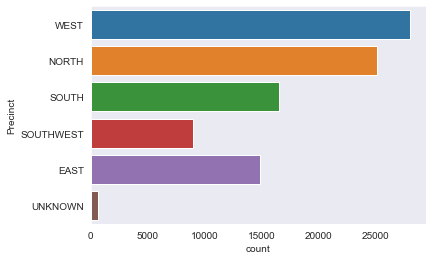

In [187]:
sns.countplot(y='Precinct', data=df)

- E levando em consideração a delegacia e o setor?

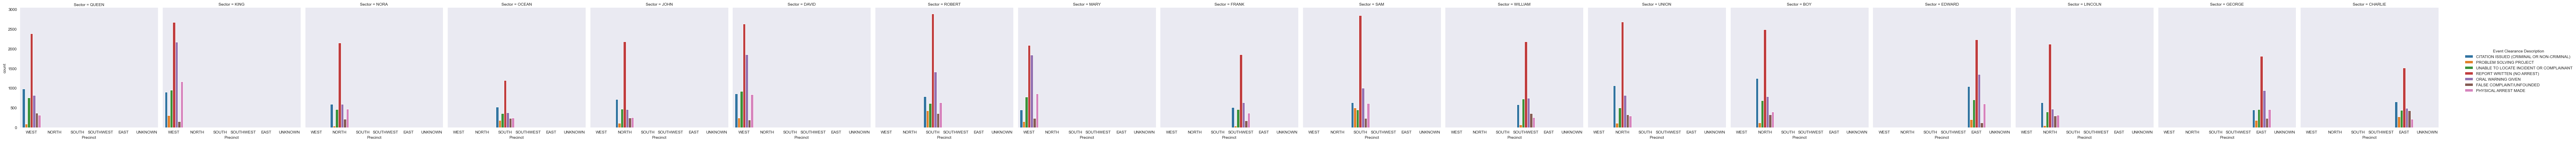

In [188]:
sns.catplot(x='Precinct', hue='Event Clearance Description', col="Sector", kind="count", data=df)

- Correlação das variáveis

<AxesSubplot:>

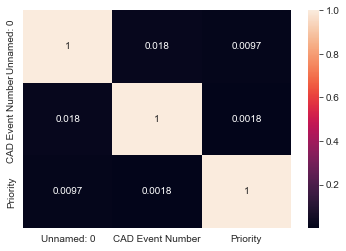

In [189]:
sns.heatmap(df.corr(), annot=True)

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

- Verificando valores nulos

In [190]:
def analisando_nulos(df):
    
    percent = df.count()/len(df.index)
    percent_df = 1 - percent
    percent_df = percent_df.to_frame()
    percent_df.rename(columns={0: 'percent'}, inplace=True)
    percent_df.head(20)
    
    sns.barplot(data=percent_df.transpose(), orient='h')
    

<AxesSubplot:>

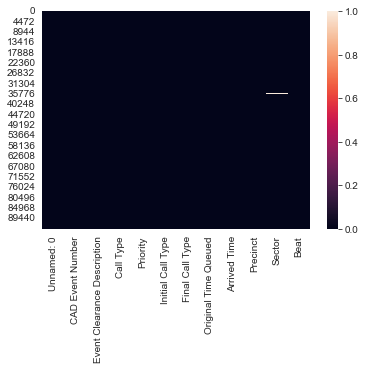

In [191]:
sns.heatmap(data=df.isnull())

In [192]:
df.count()

Unnamed: 0                     93902
CAD Event Number               93902
Event Clearance Description    93902
Call Type                      93902
Priority                       93902
Initial Call Type              93902
Final Call Type                93902
Original Time Queued           93902
Arrived Time                   93902
Precinct                       93902
Sector                         93305
Beat                           93902
dtype: int64

In [193]:
df['Sector'].isna().sum()

597

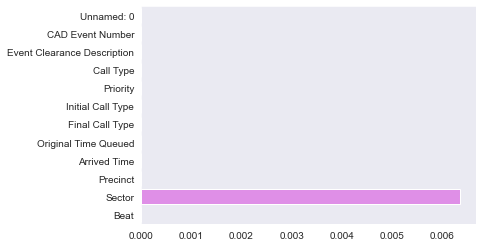

In [194]:
analisando_nulos(df)

Foi tomada a decisão de preenche-la a partir da delegacia mas foi observado que, quando essa situação ocorre, a delegacia é desconhecida. Por conta disso, resolvemos excluir essas linhas.

In [195]:
df[df['Sector'].isnull()]

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
159,367,2009000189786,REPORT WRITTEN (NO ARREST),ONVIEW,3,NARCOTICS - FOUND,NARCOTICS - FOUND,06/02/2009 01:13:53 PM,Jun 2 2009 01:13:53:000PM,UNKNOWN,NaN,DET
288,674,2009000190157,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--ASSIST OTHER AGENCY - COUNTY AGENCY,06/02/2009 06:28:44 PM,Jun 2 2009 06:28:44:000PM,UNKNOWN,NaN,TRF
423,1006,2009000190565,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,06/03/2009 12:29:32 AM,Jun 3 2009 12:29:32:000AM,UNKNOWN,NaN,99
437,1039,2009000190602,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,06/03/2009 01:18:51 AM,Jun 3 2009 01:18:51:000AM,UNKNOWN,NaN,L3
656,1553,2009000191199,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",--PREMISE CHECKS - CRIME PREVENTION,06/03/2009 02:11:29 PM,Jun 3 2009 02:11:29:000PM,UNKNOWN,NaN,US
...,...,...,...,...,...,...,...,...,...,...,...,...
92762,197609,2009000429378,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",3,AUTO THEFT - VEH THEFT OR THEFT & RECOVERY,--AUTOMOBILES - AUTO THEFT,12/14/2009 02:57:01 AM,Dec 14 2009 03:44:00:000AM,UNKNOWN,NaN,99
92903,197896,2009000429717,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",5,TRU - THEFT,--THEFT - ALL OTHER,12/14/2009 12:14:41 PM,Dec 14 2009 03:01:41:000PM,UNKNOWN,NaN,CTY
93016,198107,2009000429973,PHYSICAL ARREST MADE,ONVIEW,2,ASSIST OTHER AGENCY - ROUTINE SERVICE,--WARRANT SERVICES - FELONY,12/14/2009 04:08:14 PM,Dec 14 2009 04:08:14:000PM,UNKNOWN,NaN,99
93189,198473,2009000430434,PHYSICAL ARREST MADE,ONVIEW,7,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--WARRANT SERVICES - MISDEMEANOR,12/15/2009 03:06:44 AM,Dec 15 2009 03:06:44:000AM,UNKNOWN,NaN,99


In [196]:
df = df[df['Sector'].notnull()]

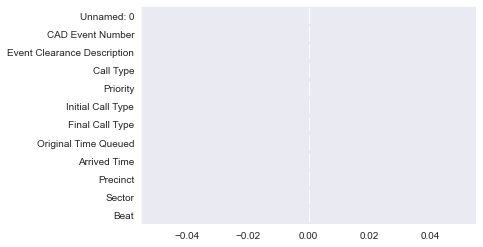

In [197]:
analisando_nulos(df)

Após isso, não foi mais observado valores nulos.

- Deletando campos Unnamed: 0 e CAD Event Number por serem sequenciais.

In [198]:
df.drop(['Unnamed: 0', 'CAD Event Number'], axis=1, inplace=True)

In [199]:
df.head(3)

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3


 - Tratando colunas de data/hora

In [200]:
hours_queued = [parser.parse(x) for x in df['Original Time Queued']]
hours_arrived = [datetime.strptime(x, '%b %d %Y %H:%M:%S:%f%p') for x in df['Arrived Time']]

In [201]:
df['hour_queued'] = [d.hour for d in hours_queued]
df['day_of_week'] = [d.weekday() for d in hours_queued]
df['hour_arrived'] = [d.hour for d in hours_arrived]

In [202]:
df['period'] = (df['hour_queued'] % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [203]:
df.drop(['Original Time Queued', 'Arrived Time'], axis=1, inplace=True)

In [204]:
df.head()

,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,hour_queued,day_of_week,hour_arrived,period
0,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,WEST,QUEEN,Q1,3,1,5,Late Night
1,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",WEST,KING,K1,3,1,3,Late Night
2,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,NORTH,NORA,N3,3,1,4,Late Night
3,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,SOUTH,OCEAN,O1,3,1,12,Late Night
4,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,WEST,KING,K2,3,1,3,Late Night


- Mapa de calor para a correlação entre as features

<AxesSubplot:>

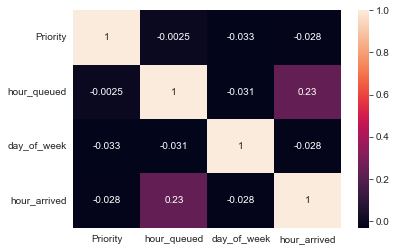

In [205]:
sns.heatmap(df.corr(),annot=True)

- Após as tratativas com as datas, podemos analisar a ocorrência de ligações durante a semana e em períodos do dia

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

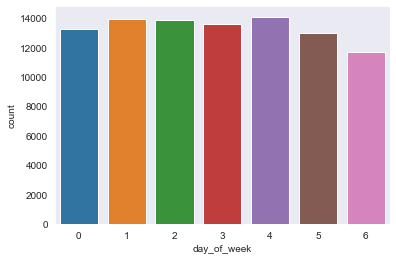

In [206]:
sns.countplot(x="day_of_week", data=df)

<AxesSubplot:xlabel='count', ylabel='period'>

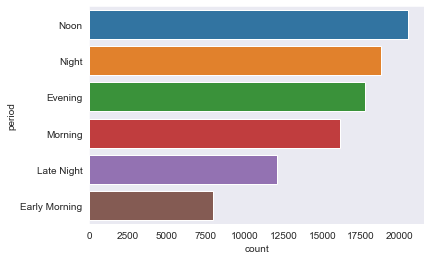

In [207]:
sns.countplot(y = 'period', data = df, order = df['period'].value_counts().index)

- Valores categóricos em variaveis numéricas

In [208]:
x = df.loc[:, df.columns != 'Event Clearance Description']

In [209]:
y = df['Event Clearance Description']

In [210]:
x = pd.get_dummies(x)

In [211]:
x.head(3)

,Priority,hour_queued,day_of_week,hour_arrived,Call Type_911,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_HISTORY CALL (RETRO),Call Type_IN PERSON COMPLAINT,Call Type_ONVIEW,Call Type_POLICE (VARDA) ALARM,...,Beat_U3,Beat_W1,Beat_W2,Beat_W3,period_Early Morning,period_Evening,period_Late Night,period_Morning,period_Night,period_Noon
0,3,3,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,3,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,3,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


- Selecionando melhores features

In [232]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=50)
selector.fit(x, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = x.iloc[:,cols]

In [248]:
features_df_new.head()

,Priority,hour_arrived,Call Type_911,Call Type_ALARM CALL (NOT POLICE ALARM),Call Type_ONVIEW,"Call Type_TELEPHONE OTHER, NOT 911","Initial Call Type_ALARM - COMM, HOLD-UP/PANIC (EXCEPT BANKS)","Initial Call Type_ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","Initial Call Type_ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",Initial Call Type_ALARM - RESIDENTIAL - SILENT/AUD PANIC/DURESS,...,Final Call Type_--THEFT - CAR PROWL,Final Call Type_--TRAFFIC - D.U.I.,Final Call Type_--TRAFFIC - MOVING VIOLATION,Final Call Type_--TRAFFIC - MV COLLISION INVESTIGATION,Final Call Type_--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),Final Call Type_--WARRANT SERVICES - FELONY,Final Call Type_--WARRANT SERVICES - MISDEMEANOR,"Final Call Type_ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","Final Call Type_ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE","Final Call Type_PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY"
0,3,5,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,12,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
print('Original number of features:', x.shape[1])
print('Reduced number of features:', features_df_new.shape[1])

Original number of features: 614
Reduced number of features: 50


**5. Construa os modelos de aprendizagem de máquina para cada modelo (1,0 ponto)** 

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [235]:
from sklearn.model_selection import train_test_split
good_data = x
x = features_df_new
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_STATE)

In [236]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE)
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)

In [237]:
rfc.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [238]:
preds_rfc = rfc.predict(X_test)
preds_dtc = dtc.predict(X_test)

In [239]:
rfc.predict_proba(X_test)

array([[1.48454951e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.00666147e-01, 6.93354036e-02],
       [3.44852578e-02, 0.00000000e+00, 2.48441966e-01, ...,
        8.57799210e-03, 5.48285751e-01, 2.93420188e-02],
       [0.00000000e+00, 0.00000000e+00, 3.74100328e-02, ...,
        0.00000000e+00, 5.35025738e-01, 2.77402762e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.34271071e-02, ...,
        0.00000000e+00, 2.74028221e-01, 6.06096598e-01],
       [5.87322786e-01, 3.88552293e-03, 9.41982251e-02, ...,
        4.48289686e-04, 1.05908524e-03, 3.12602675e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [240]:
dtc.predict_proba(X_test)

array([[1.42857143e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.00000000e-01, 7.14285714e-02],
       [3.65296804e-02, 0.00000000e+00, 2.46575342e-01, ...,
        9.13242009e-03, 5.47945205e-01, 2.73972603e-02],
       [0.00000000e+00, 0.00000000e+00, 3.77358491e-02, ...,
        0.00000000e+00, 5.37735849e-01, 2.73584906e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 8.69565217e-02, ...,
        0.00000000e+00, 2.60869565e-01, 6.08695652e-01],
       [5.85783004e-01, 3.74131480e-03, 9.46018172e-02, ...,
        5.34473544e-04, 1.06894709e-03, 3.13735970e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [241]:
print(classification_report(y_test, preds_rfc))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.66      0.85      0.74      3827
                 FALSE COMPLAINT/UNFOUNDED       0.95      0.87      0.91      1311
                        ORAL WARNING GIVEN       0.69      0.58      0.63      5068
                      PHYSICAL ARREST MADE       0.75      0.50      0.60      2575
                   PROBLEM SOLVING PROJECT       0.92      0.87      0.90       918
                REPORT WRITTEN (NO ARREST)       0.77      0.92      0.84     11256
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.54      0.29      0.37      3037

                                  accuracy                           0.74     27992
                                 macro avg       0.75      0.70      0.71     27992
                              weighted avg       0.73      0.74      0.72     27992



In [242]:
f1_score(y_test, preds_rfc, average='weighted')

0.7207084532508835

In [243]:
print(classification_report(y_test,preds_dtc))

                                            precision    recall  f1-score   support

CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)       0.65      0.86      0.74      3827
                 FALSE COMPLAINT/UNFOUNDED       0.95      0.87      0.91      1311
                        ORAL WARNING GIVEN       0.69      0.58      0.63      5068
                      PHYSICAL ARREST MADE       0.73      0.50      0.59      2575
                   PROBLEM SOLVING PROJECT       0.93      0.86      0.89       918
                REPORT WRITTEN (NO ARREST)       0.77      0.91      0.84     11256
  UNABLE TO LOCATE INCIDENT OR COMPLAINANT       0.55      0.27      0.37      3037

                                  accuracy                           0.74     27992
                                 macro avg       0.75      0.69      0.71     27992
                              weighted avg       0.73      0.74      0.72     27992



In [244]:
f1_score(y_test, preds_dtc, average='weighted')

0.7187542727904633

**6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation (2,0 pontos)**
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância de no mínimo um hiperparâmetro para cada modelo

- Aplicando combinações para o DecisionTreeClassifier

In [245]:
scores = cross_val_score(estimator=dtc, X=X_train, y=y_train, scoring='f1_weighted')
print('New F1-Score', scores)
print('New F1-Score Mean', scores.mean())

New F1-Score [0.72261337 0.71317068 0.72280002 0.71769766 0.71593788]
New F1-Score Mean 0.7184439214505272


In [249]:
parameters = {
    'min_samples_leaf': range(2, 6), 
    'min_samples_split':[3,5,7], 
    'max_depth':[10, 20, 30],
    'random_state': [RANDOM_STATE]
}

gsc = GridSearchCV(dtc, parameters, cv=5, scoring='f1_weighted')
gsc.fit(X_train, y_train)

print(gsc.best_score_)
print(gsc.best_estimator_)
print(gsc.best_params_)

0.7210160939478374
DecisionTreeClassifier(max_depth=30, min_samples_leaf=3, min_samples_split=7,
                       random_state=100)
{'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 7, 'random_state': 100}


- Aplicando combinações para o RandomForestClassifier

In [250]:
scores = cross_val_score(estimator=rfc, X=X_train, y=y_train, scoring='f1_weighted')
print('New F1-Score', scores)
print('New F1-Score Mean', scores.mean())

New F1-Score [0.72421204 0.71514662 0.72574951 0.72114634 0.71692988]
New F1-Score Mean 0.7206368790114748


In [251]:
parameters = {
    'min_samples_leaf': range(2, 6), 
    'min_samples_split':[3,5,7], 
    'max_depth':[10, 20, 30],
    'random_state': [RANDOM_STATE]
}

gsc = GridSearchCV(rfc, parameters, cv=5, scoring='f1_weighted')
gsc.fit(X_train, y_train)

print(gsc.best_score_)
print(gsc.best_estimator_)
print(gsc.best_params_)

0.7240245036392186
RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       random_state=100)
{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 100}


**7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (1,0 ponto)**

**8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos. (1,5 pontos)**
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar neccessário

 - Curvas de Aprendizagem

In [255]:
def plot_learning_curve(estimator, title, X, y,):
    
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    ylim=(0.7, 1.01)
    n_jobs=1
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [263]:
#plot_learning_curve(dtc, "Learning Curves (Decision Tree)", x, y)

<module 'matplotlib.pyplot' from 'c:\\users\\112865\\appdata\\local\\programs\\python\\python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

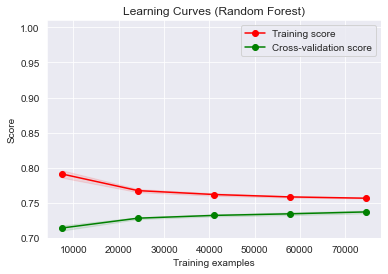

In [262]:
plot_learning_curve(rfc, "Learning Curves (Random Forest)", x, y)

- Underfitting e Overfitting

In [256]:
def model_complexity(estimator, title, param_name, values_param, scoring, X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

    # Vary the max_depth parameter from 1 to 10

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(estimator, X, y, \
        param_name = param_name, param_range = values_param, cv = cv, scoring = scoring)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    ylim=(0.7, 1.01)
    plt.ylim(*ylim)
    plt.title(title)
    plt.grid()
    plt.plot(values_param, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(values_param, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(values_param, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(values_param, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

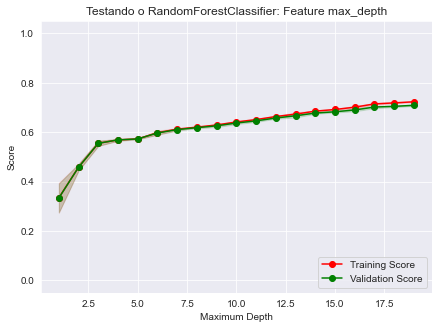

In [270]:
model_complexity(RandomForestClassifier(), 
                 'RandomForestClassifier: Feature max_depth', 
                 'max_depth', np.arange(1, 20), 'f1_weighted', x, y)

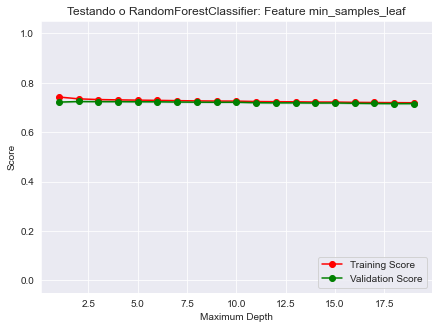

In [271]:
model_complexity(RandomForestClassifier(), 
                 'RandomForestClassifier: Feature min_samples_leaf', 
                 'min_samples_leaf', np.arange(1, 20), 'f1_weighted', x, y)

**9. Realize a predição sobre os dados test_call_data.csv, disponibilizado a parte do arquivo Call_Data.csv, como o seu modelo saiu? (1,0 ponto)**

**10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

In [253]:
features = x.columns
df_import_features = dict(zip(features, rfc.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns = ['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)

,value
Priority,0.129380
Call Type_ONVIEW,0.082411
Initial Call Type_PARKING VIOLATION (EXCEPT ABANDONED CAR),0.060279
hour_arrived,0.060223
Call Type_ALARM CALL (NOT POLICE ALARM),0.056604


 **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais (2,0 pontos)**

For n_clusters = 2 The average silhouette_score is  0.45152937201531834
For n_clusters = 3 The average silhouette_score is  0.4067180678561171
For n_clusters = 4 The average silhouette_score is  0.39548784567752304
For n_clusters = 5 The average silhouette_score is  0.3918002926330574
For n_clusters = 6 The average silhouette_score is  0.37892305644737423
For n_clusters = 7 The average silhouette_score is  0.3481024353531185
For n_clusters = 8 The average silhouette_score is  0.3030894416206131
For n_clusters = 9 The average silhouette_score is  0.28927999094633733
For n_clusters = 10 The average silhouette_score is  0.2555113489318462
For n_clusters = 11 The average silhouette_score is  0.2385982314277379
For n_clusters = 12 The average silhouette_score is  0.23975949314888645
For n_clusters = 13 The average silhouette_score is  0.24177970803696952
For n_clusters = 14 The average silhouette_score is  0.22068095255852727


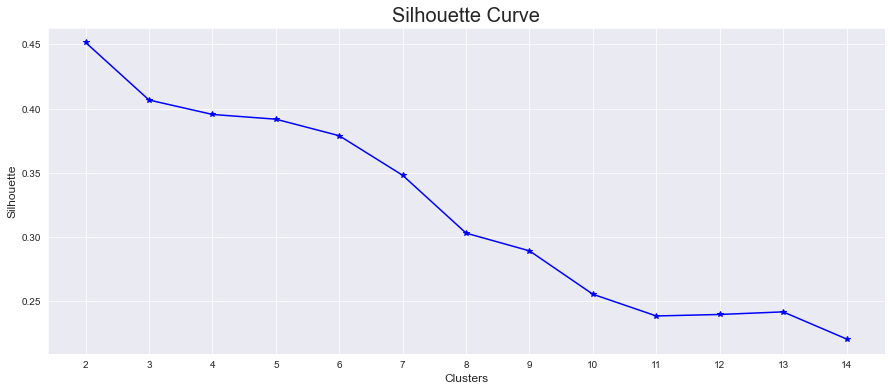

In [254]:
sil = []
for k in range(2, 11):
    kmeans_ = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans_.fit(x)
    score = silhouette_score(x, kmeans_.predict(x))
    print("For n_clusters =", k,
          "The average silhouette_score is ", score)
    sil.append(score)

cluster = np.arange(2, 11)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

# Bom trabalho!